In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electric-vehicle-population-data/Electric_Vehicle_Population_Data.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
df = pd.read_csv('..//input/electric-vehicle-population-data/Electric_Vehicle_Population_Data.csv')

In [5]:
df.shape

(130443, 17)

In [6]:
df.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [7]:
df.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


<Axes: title={'center': 'Top 10 EV Manufacturers'}>

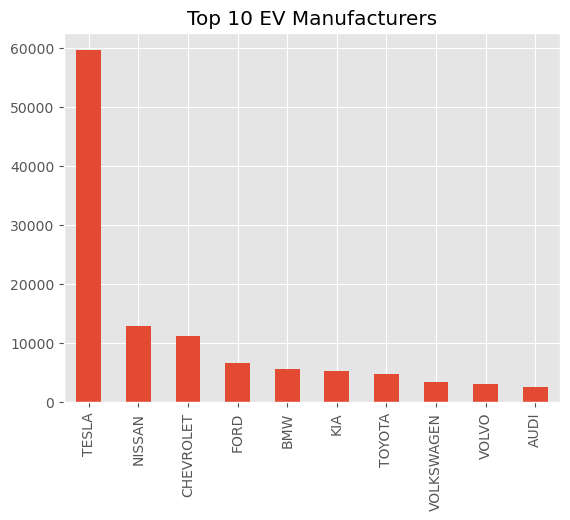

In [8]:
df["Make"].value_counts().head(10)\
.plot(kind = 'bar', title="Top 10 EV Manufacturers")

Shows that Tesla has a very large percentage of the EV Marketshare.

<Axes: title={'center': 'Top 10 EV Manufacturers before 2018'}>

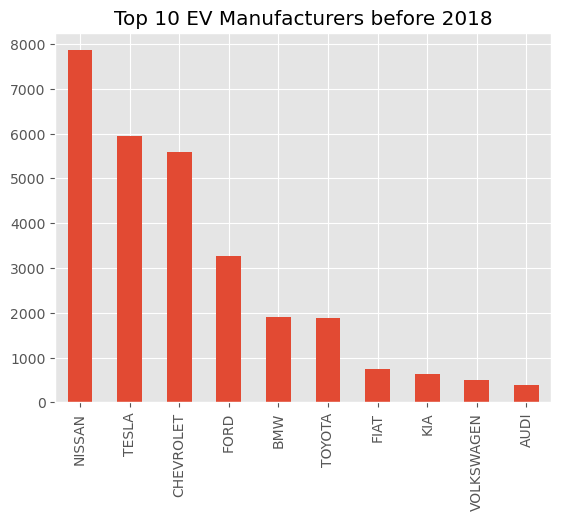

In [9]:
#Percentage of EV's by manufacturer before 2018
df_before_2018 = df[df['Model Year'] < 2018]
df_before_2018["Make"].value_counts().head(10)\
.plot(kind = 'bar', title="Top 10 EV Manufacturers before 2018")

Shows that before 2018 Nissan was a huge player in the Electric Vehicle space. But ever since they have stayed stagnant while Tesla has consumed the marketplace.

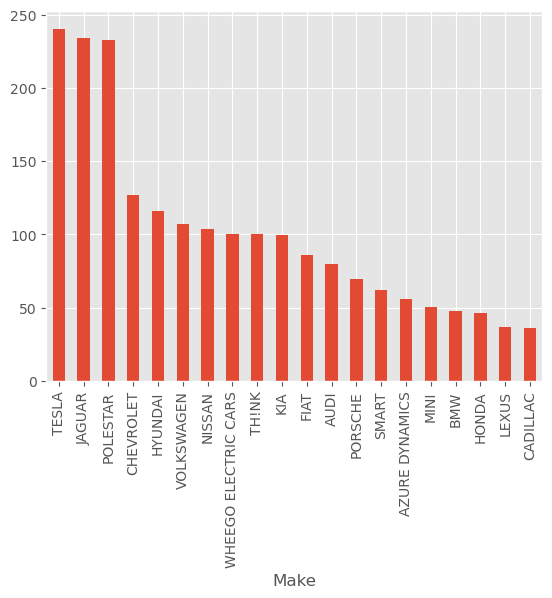

In [30]:
#Sort list by top selling Manufacturers and their average Range
non_zero_range = df[df["Electric Range"]> 0]
non_zero_range.shape
average_range = non_zero_range.groupby('Make')['Electric Range'].mean()
average_range = average_range.sort_values(ascending=False).head(20).plot(kind='bar')
vehicle_counts = df['Make'].value_counts()

#result = pd.concat([vehicle_counts, average_range], axis=1)
#result.columns = ['Vehicle_Counts', "Average_Range"]
#result.sort_values(by= 'Vehicle_Counts', ascending = False).head(20)\
#.plot(kind='bar')
#.plot(kind ='scatter', x='Vehicle_Counts', y='Average_Range', labels='Make', title = 'Manufacturer Vehicles sold by average Range of Vehicles')

<Axes: title={'center': 'Manufacturer Vehicles sold by average Range of Vehicles (Non Tesla)'}, xlabel='Vehicle_Counts', ylabel='Average_Range'>

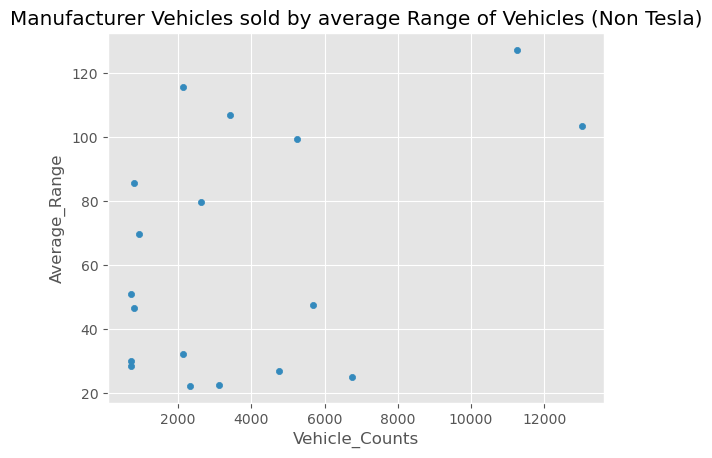

In [11]:
#Sort list by top selling Manufacturers and their average Range

non_tesla_zero_range = df[(df["Electric Range"] > 0) & (df['Make'] != "TESLA")]
non_tesla_zero_range.shape
average_range = non_tesla_zero_range.groupby('Make')['Electric Range'].mean()
vehicle_counts = df['Make'].value_counts()
result = pd.concat([vehicle_counts, average_range], axis=1)
result.columns = ['Vehicle_Counts', "Average_Range"]
result.sort_values(by= 'Vehicle_Counts', ascending = False).head(20)\
.plot(kind ='scatter', x='Vehicle_Counts', y='Average_Range', title = 'Manufacturer Vehicles sold by average Range of Vehicles (Non Tesla)')

In [13]:
df["Electric Range"].value_counts().head(20)

0      53446
215     6436
220     4152
84      4043
238     3487
25      3152
19      2544
208     2506
53      2470
291     2379
38      2247
21      2127
32      2088
75      1923
210     1897
322     1697
266     1444
150     1398
30      1372
73      1314
Name: Electric Range, dtype: int64

<Axes: title={'center': "EV's Manufactured by Year"}>

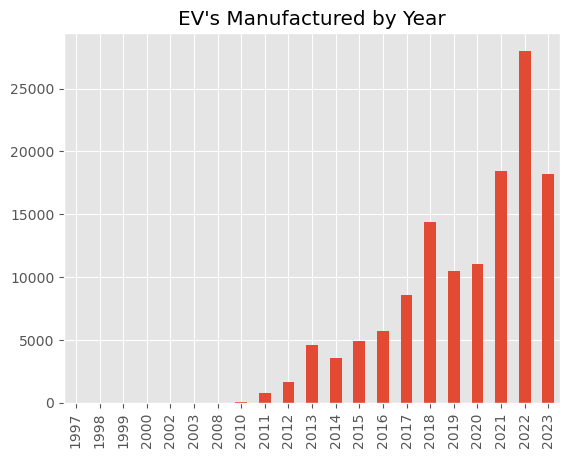

In [14]:
#EV's Manufactured by year
df["Model Year"].value_counts().sort_index()\
.plot(kind='bar', title = "EV's Manufactured by Year")

<Axes: title={'center': "EV's Manufactured by Year"}>

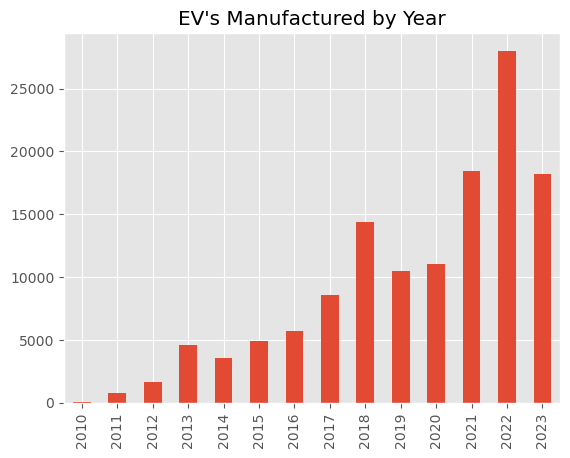

In [15]:
#EVs Manufactured by Year Bar Graph
df_2010_current = df[df['Model Year']>2009]
df_2010_current["Model Year"].value_counts().sort_index()\
.plot(kind='bar', title = "EV's Manufactured by Year")

This chart shows the EV's manufactured each year, exluding years before 2010.

<Axes: title={'center': 'Top 10 EV Manufacturers'}>

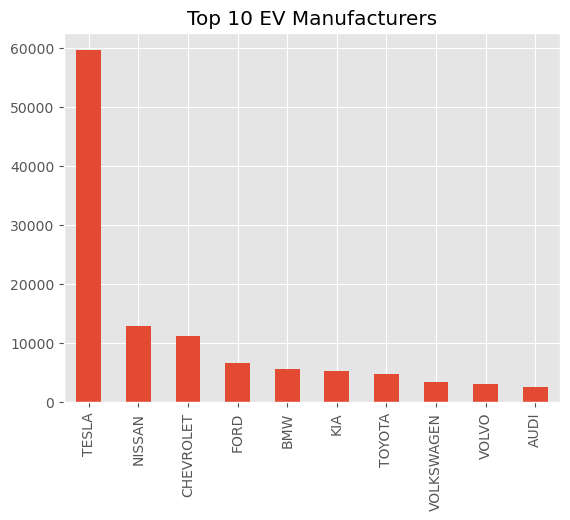

In [16]:
df["Make"].value_counts().head(10)\
.plot(kind = 'bar', title="Top 10 EV Manufacturers")

In [17]:
#Sort list by top selling Manufacturers and their average Range
non_zero_range = df[df["Electric Range"]> 0]
average_range = non_zero_range.groupby('Make')['Electric Range'].mean()
vehicle_counts = df['Make'].value_counts()
result = pd.concat([vehicle_counts, average_range], axis=1)
result.columns = ['Vehicle_Counts', "Average_Range"]
result.sort_values(by= 'Vehicle_Counts', ascending = False).head(20)

,Vehicle_Counts,Average_Range
TESLA,59629,240.392349
NISSAN,13023,103.398550
CHEVROLET,11251,127.203143
FORD,6743,25.064895
BMW,5696,47.591609
KIA,5252,99.409820
TOYOTA,4770,26.775592
VOLKSWAGEN,3432,106.860870
VOLVO,3113,22.524651
AUDI,2622,79.751451


This chart shows that Tesla has by far the best average EV Range when compared to any other competitor in the marketplace.

<Axes: title={'center': 'Top 10 Most Popular EV Car Models'}, ylabel='Model'>

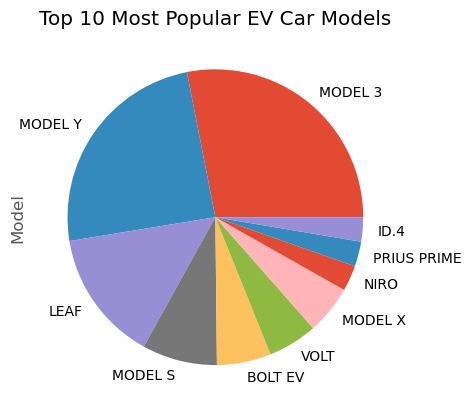

In [18]:
#Top 10 Most popular EV Car Models
df["Model"].value_counts().head(10)\
.plot(kind='pie', title='Top 10 Most Popular EV Car Models')

This chart shows that the Tesla Model Y and Model 3 have over 50% of the marketshare of electric vehicles.